In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#Description: This program determine the worst and best moments for returns using python 

In [2]:
df=yf.Ticker('^GSPC').history(start='1974-12-31',end='2022-11-23')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1974-12-30,0.000000,67.650002,66.230003,67.160004,18520000,0,0
1974-12-31,0.000000,69.040001,67.150002,68.559998,20970000,0,0
1975-01-02,0.000000,70.919998,68.650002,70.230003,14800000,0,0
1975-01-03,0.000000,71.639999,69.290001,70.709999,15270000,0,0
1975-01-06,0.000000,72.239998,70.330002,71.070000,17550000,0,0
...,...,...,...,...,...,...,...
2022-11-16,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,0,0
2022-11-17,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,0,0
2022-11-18,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0


In [3]:
#Create lists to store the returns of each day in that month
Jan=[]
Feb=[]
Mar=[]
Apr=[]
May=[]
June=[]
July=[]
Aug=[]
Sep=[]
Otc=[]
Nov=[]
Dec=[]
#Create a function get the returns for each month and append it to the corresponding list
def get_returns(month,returns):
    if month=='01':
        Jan.append(float(returns))
    elif month =='02':
        Feb.append(float(returns))
    elif month =='03':
        Mar.append(float(returns))
    elif month =='04':
        Apr.append(float(returns))
    elif month =='05':
        May.append(float(returns))
    elif month =='06':
        June.append(float(returns))
    elif month =='07':
        July.append(float(returns))
    elif month =='08':
        Aug.append(float(returns))
    elif month =='09':
        Sep.append(float(returns))
    elif month =='10':
        Otc.append(float(returns))
    elif month =='11':
        Nov.append(float(returns))
    elif month =='12':
        Dec.append(float(returns))
    else:
        print('Something is wrong with the input for month')

In [4]:
#Calculate and Show the daily simple returns
DSR=df['Close'].pct_change(1)
df['DSR']=DSR

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,DSR
Date,,,,,,,,
1974-12-30,0.000000,67.650002,66.230003,67.160004,18520000,0,0,NaN
1974-12-31,0.000000,69.040001,67.150002,68.559998,20970000,0,0,0.020846
1975-01-02,0.000000,70.919998,68.650002,70.230003,14800000,0,0,0.024358
1975-01-03,0.000000,71.639999,69.290001,70.709999,15270000,0,0,0.006835
1975-01-06,0.000000,72.239998,70.330002,71.070000,17550000,0,0,0.005091
...,...,...,...,...,...,...,...,...
2022-11-16,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,0,0,-0.008252
2022-11-17,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,0,0,-0.003089
2022-11-18,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0,0.004759


In [6]:
#Create a loop to gather the daily Simple returns of each month from the date set
#and append them to the lists
for i in range(0,len(df)):
    df_date=str(df.index[i])
    df_returns= df['DSR'][i]
    df_month=df_date.split('-')[1]
    #add the returns to the list corresponding to that month
    get_returns(df_month,df_returns)
np.isnan(Dec).any()

True

In [7]:
#Create a function to average the returns of each month
def AVG(month):
    month=[item for item in month if not(pd.isnull(item)) == True]
    return[sum(month)/len(month)]

In [8]:
#Create a new dataframe
df_AVG=pd.DataFrame()
#Get the average returns for each month and add the values under a new column 'AVG'
df_AVG['AVG']=AVG(Jan)+AVG(Feb)+AVG(Mar)+AVG(Apr)+AVG(May)+AVG(June)+AVG(July)+AVG(Aug)+AVG(Sep)+AVG(Otc)+AVG(Nov)+AVG(Dec)
#Set the index to be the corresponding integer value of the month
df_AVG=df_AVG.set_index(df_AVG.index+1)

In [9]:
df_AVG

,AVG
1,0.000539
2,0.000044
3,0.000521
4,0.000882
5,0.000376
6,0.000215
7,0.000489
8,0.000079
9,-0.000408
10,0.000420


In [10]:
df_AVG*100

,AVG
1,0.053896
2,0.004432
3,0.052053
4,0.088187
5,0.037583
6,0.021505
7,0.048875
8,0.007916
9,-0.040837
10,0.042046


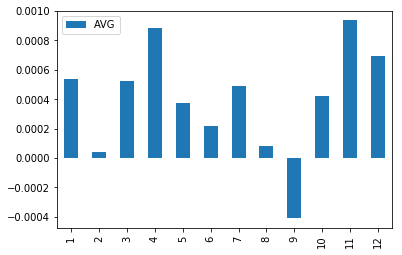

In [11]:
#Plot the Average Monthly Returns
df_AVG.plot.bar()